In [2]:
# 1. Compute DFT and IDFT of a signal.

import numpy as np

x = np.array([1, 2, 3, 4])

def manual_dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

def manual_idft(X):
    N = len(X)
    x_rec = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x_rec[n] += X[k] * np.exp(2j * np.pi * k * n / N)
    return x_rec / N

X = manual_dft(x)
x_reconstructed = manual_idft(X)

print("DFT:", X)
print("IDFT (Reconstructed x):", np.round(x_reconstructed.real, 5))

DFT: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
IDFT (Reconstructed x): [1. 2. 3. 4.]


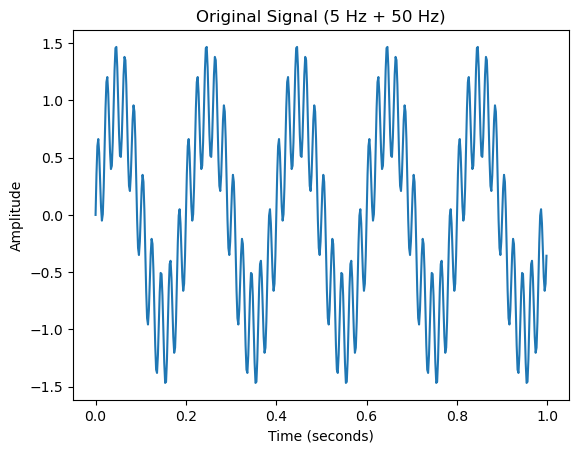

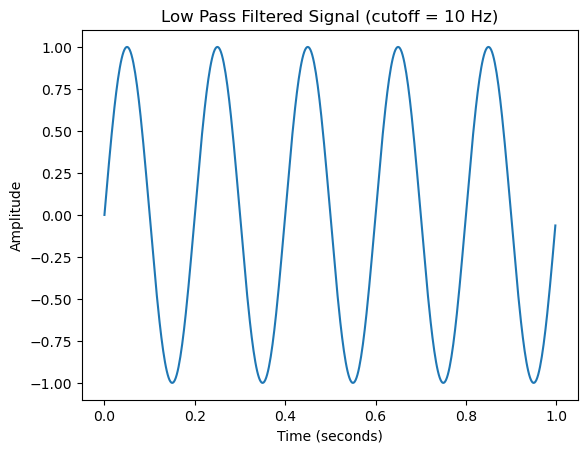

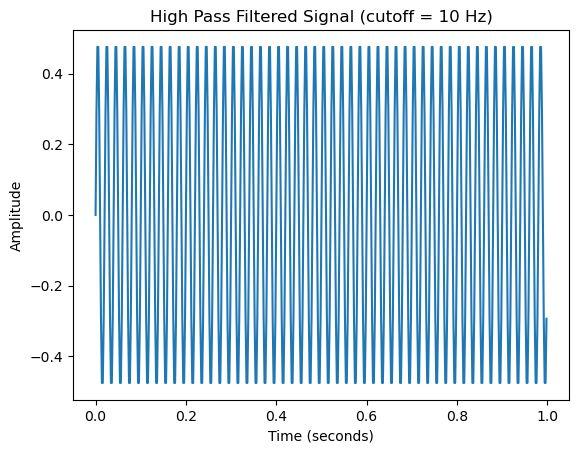

In [4]:
# 2. Design a low pass and a high pass filter.

import numpy as np
import matplotlib.pyplot as plt

fs = 500  # Sampling frequency in Hz
t = np.arange(0, 1, 1/fs)  

# low freq (5 Hz) and high freq (50 Hz) sine waves
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)
plt.plot(t, x)
plt.title("Original Signal (5 Hz + 50 Hz)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()
N = len(x)
X = np.fft.fft(x)
freq = np.fft.fftfreq(N, 1/fs)
cutoff = 10  # cutoff frequency low pass

low_pass_mask = np.abs(freq) <= cutoff
X_low = X * low_pass_mask  

# Filtered signal back to time domain
x_low = np.fft.ifft(X_low).real
plt.plot(t, x_low)
plt.title("Low Pass Filtered Signal (cutoff = 10 Hz)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()
cutoff = 10  # cutoff frequency for high pass

high_pass_mask = np.abs(freq) > cutoff
X_high = X * high_pass_mask

x_high = np.fft.ifft(X_high).real
plt.plot(t, x_high)
plt.title("High Pass Filtered Signal (cutoff = 10 Hz)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


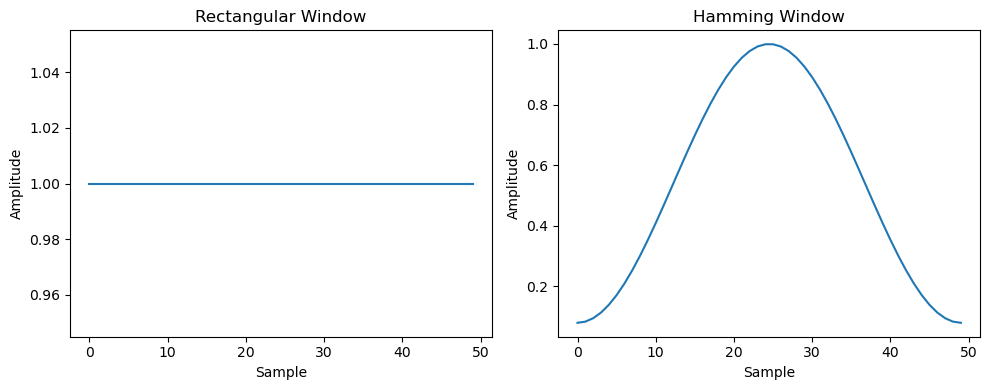

In [5]:
# 3. Design a rectangular and a hamming window

import numpy as np
import matplotlib.pyplot as plt

N = 50  # window length
rect_window = np.ones(N)
hamming_window = np.hamming(N)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(rect_window)
plt.title("Rectangular Window")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.subplot(1,2,2)
plt.plot(hamming_window)
plt.title("Hamming Window")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


In [7]:
# 4. Compute the z transform of a signal.

import sympy as sp

z = sp.symbols('z')
x = [1, 2, 3, 4]

Xz = sum(x[n] * z**(-n) for n in range(len(x)))
print(Xz)


1 + 2/z + 3/z**2 + 4/z**3


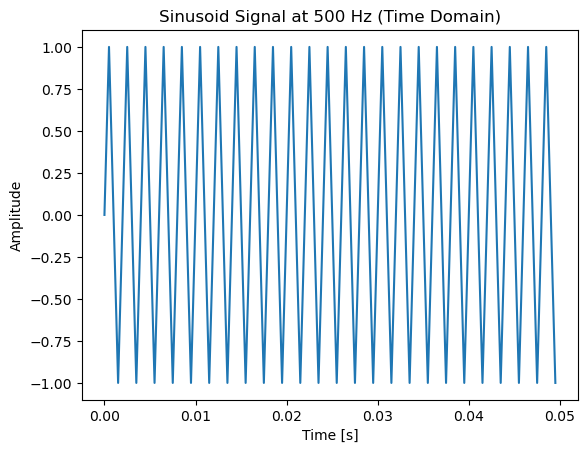

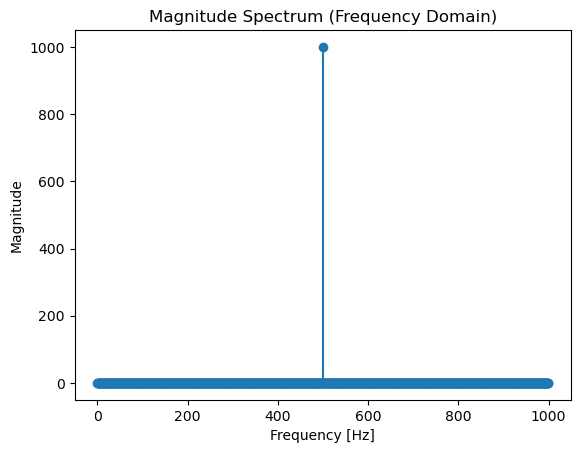

In [8]:
# 5. Sample a sinusoid signal at a frequency of 500 Hz/ given frequency .

import numpy as np
import matplotlib.pyplot as plt

fs = 2000        # Sampling frequency (Hz), must be > 2 * freq to avoid aliasing
f = 500          # Frequency of the sinusoid (Hz)
t = np.arange(0, 1, 1/fs)  # 1 second of samples

x = np.sin(2 * np.pi * f * t)  # Generate sinusoid signal
N = len(x)
X = np.fft.fft(x)
freq = np.fft.fftfreq(N, 1/fs)
plt.plot(t[:100], x[:100])  # Plot first 100 samples for clarity
plt.title(f"Sinusoid Signal at {f} Hz (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()
plt.stem(freq[:N//2], np.abs(X)[:N//2], basefmt=" ")
plt.title("Magnitude Spectrum (Frequency Domain)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()

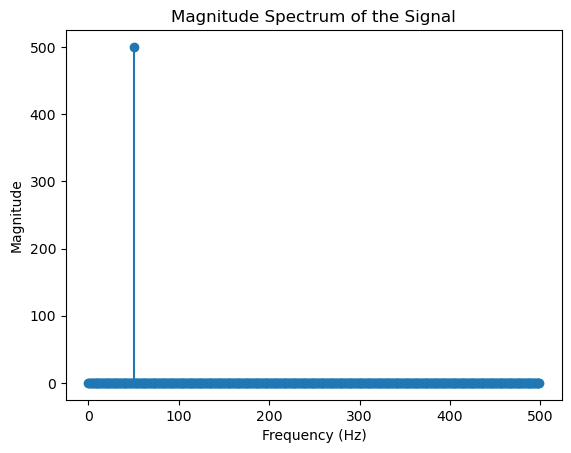

In [9]:
# 6. Compute FFT of a signal.

import numpy as np
import matplotlib.pyplot as plt

fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # 1 second time vector

# Example signal: 50 Hz sine wave
f = 50
x = np.sin(2 * np.pi * f * t)
X = np.fft.fft(x)
N = len(X)
freq = np.fft.fftfreq(N, 1/fs)
plt.stem(freq[:N//2], np.abs(X)[:N//2], basefmt=" ")
plt.title("Magnitude Spectrum of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()


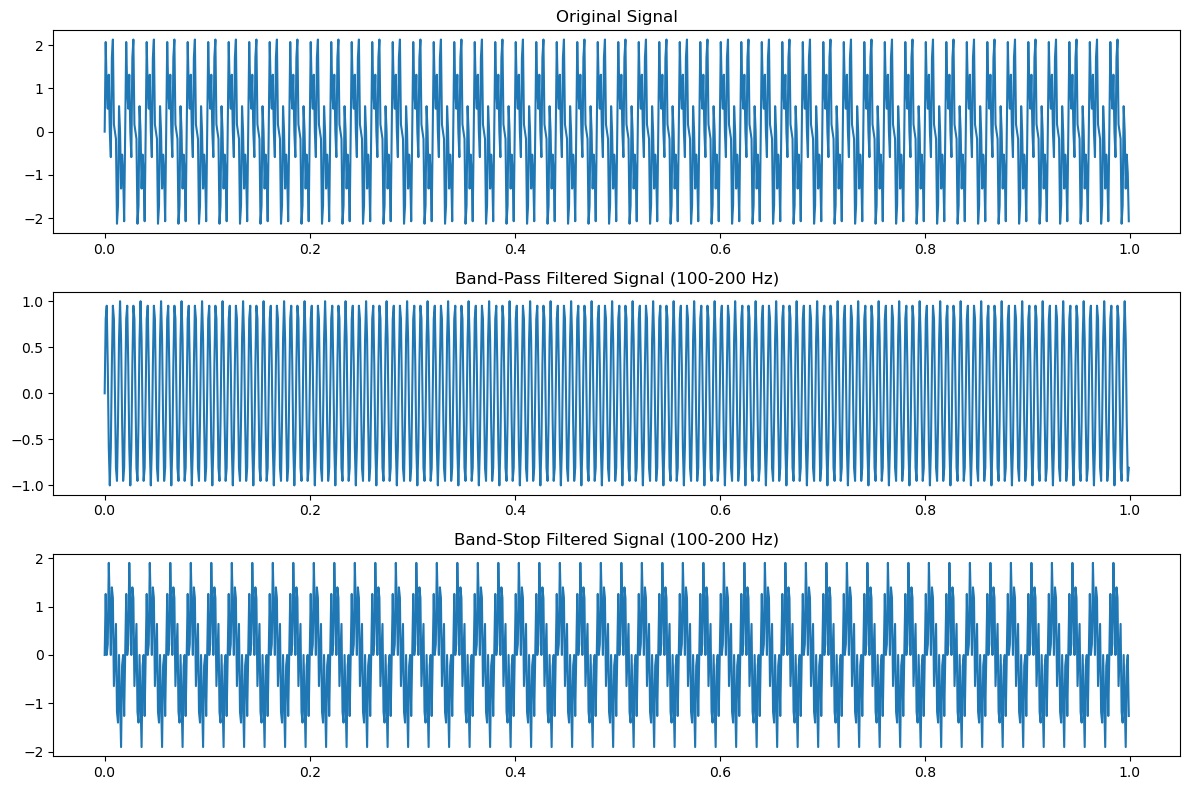

In [10]:
# 7. Design a band-pass and band- stop filter.

import numpy as np
import matplotlib.pyplot as plt

fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # 1 second

# Signal with 50 Hz, 150 Hz, and 300 Hz components
x = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*150*t) + np.sin(2*np.pi*300*t)
N = len(x)
X = np.fft.fft(x)
freq = np.fft.fftfreq(N, 1/fs)
low_cut = 100
high_cut = 200
# Band-Pass: keep frequencies between low_cut and high_cut
band_pass_mask = (np.abs(freq) >= low_cut) & (np.abs(freq) <= high_cut)

# Band-Stop: block frequencies between low_cut and high_cut
band_stop_mask = ~band_pass_mask
X_band_pass = X * band_pass_mask
X_band_stop = X * band_stop_mask

x_band_pass = np.fft.ifft(X_band_pass).real
x_band_stop = np.fft.ifft(X_band_stop).real
plt.figure(figsize=(12, 8))

plt.subplot(3,1,1)
plt.plot(t, x)
plt.title("Original Signal")

plt.subplot(3,1,2)
plt.plot(t, x_band_pass)
plt.title(f"Band-Pass Filtered Signal ({low_cut}-{high_cut} Hz)")

plt.subplot(3,1,3)
plt.plot(t, x_band_stop)
plt.title(f"Band-Stop Filtered Signal ({low_cut}-{high_cut} Hz)")

plt.tight_layout()
plt.show()
